### ***INSTALLATION OF LIBRARIES***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# Model 
from sklearn.neighbors import KNeighborsClassifier # To model the KNN classifier
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to 

from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of 

from sklearn import preprocessing # Provides several common utility functions: standardization 

from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean 

from sklearn.metrics import accuracy_score # Performance measure – Accuracy

import cv2 as cv



### ***READ CSV FILE***

The "HAM10000" dataset was collected from Kaggle.

The following snippet of code shows how to use Python's pandas module to read the "HAM10000_metadata.csv" file. To read your dataset into a DataFrame named data, replace 'HAM10000_metadata.csv' with the exact path to your dataset file.

In [2]:
data=pd.read_csv('HAM10000_metadata.csv')
data=data.drop(columns=['lesion_id'])
data.head()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


### ***DATA CLEANING***


*   Dropped rows with missing values using the 'dropna()' method.
*   Checked for missing values using 'isnull().sum()'.
*   displayed the quantity of missing data in each cleaned DataFrame column.


After this cleaning step,dataset will be free from missing values and ready for further analysis or modeling.

In [3]:
data.isnull().sum()

image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [4]:
data=data.dropna()
data.isnull().sum()

image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

### ***DATA VISUALIZATION***

Visualizing the "dx" (diagnosis) and "localization" columns can provide insights into the distribution and relationships within the "ham10000_metadata.csv" dataset.

#### 1. Countplot for Diagnosis (dx)

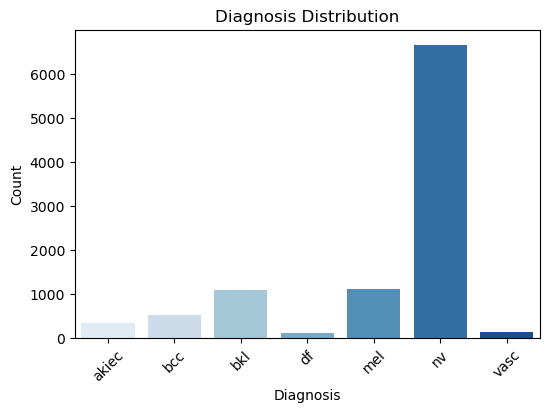

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='dx', palette='Blues', order=data['dx'].value_counts().sort_index().index)
plt.title('Diagnosis Distribution')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 2. Countplot for Localization

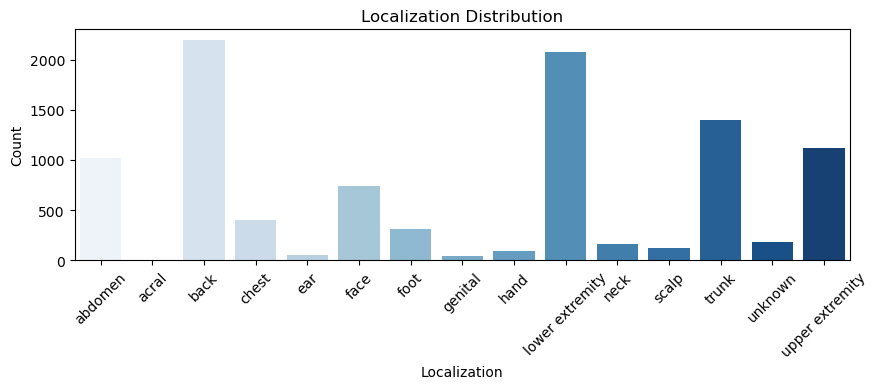

In [6]:
plt.figure(figsize=(10, 3))
sns.countplot(data=data, x='localization', palette='Blues',
              order=data['localization'].value_counts().sort_index().index)
plt.title('Localization Distribution')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### ***DATA PRE-PROCESSING***

The data preprocessing code reads image files from a directory, resizes them, and converts them to RGB format.


*   Define the directory path where the image files are located.
*   Read the image file in color mode (BGR format).
*   Resize the image to 100x100 pixels
*   convert its color format from BGR to RGB.


After executing this code, image_value will contain a list of sublists. Each sublist will have a preprocessed image array and its corresponding diagnosis from the 'data' DataFrame.

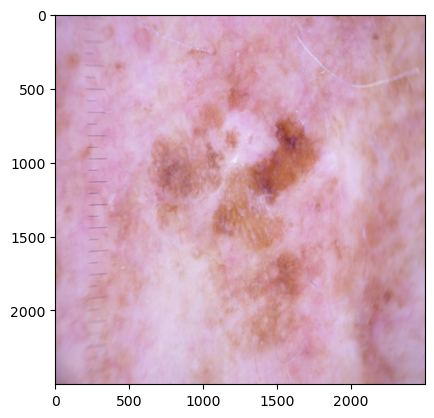

bkl


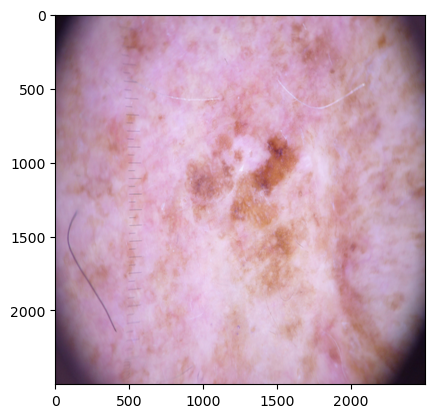

bkl


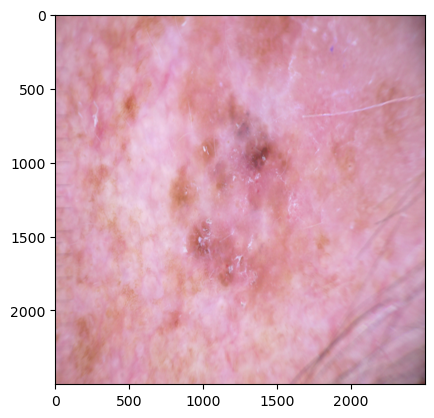

bkl


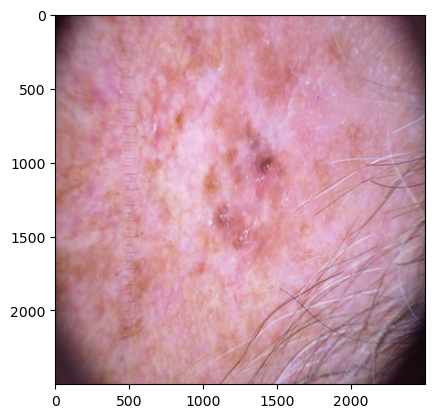

bkl


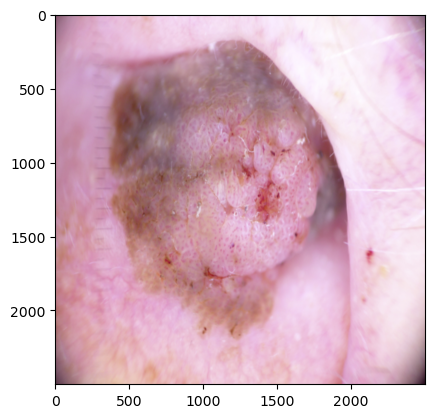

bkl


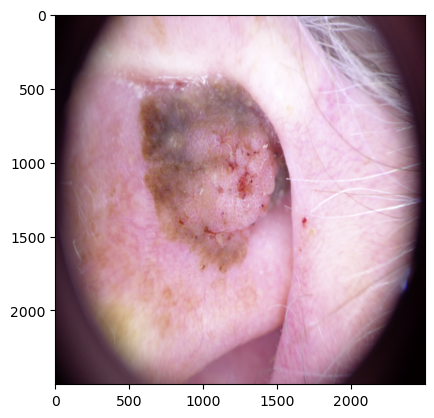

bkl


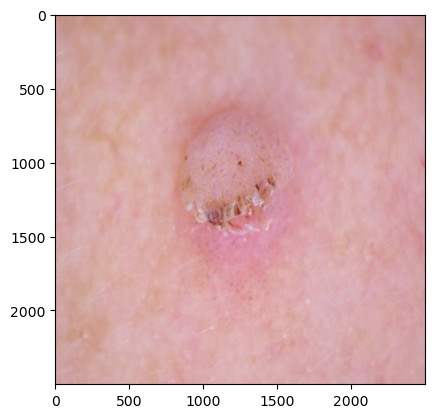

bkl


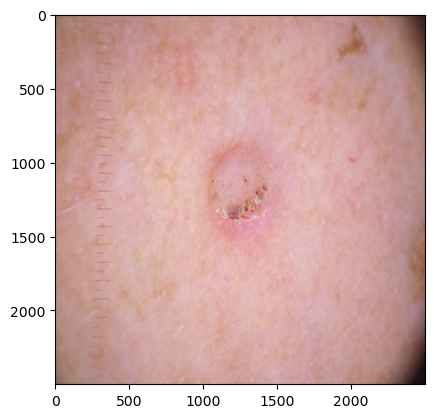

bkl


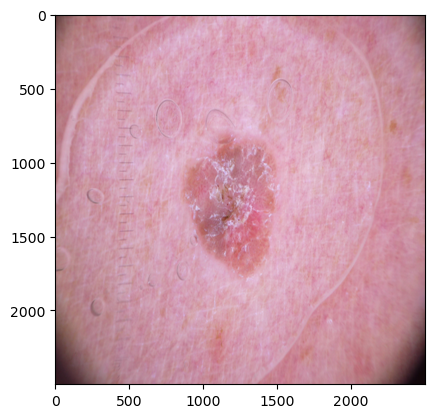

bkl


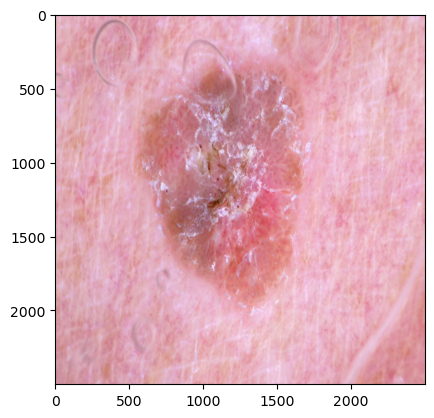

bkl


In [7]:
#The purpose of such code could be to get a quick visual sense of the images and their corresponding labels in the dataset. It allows you to verify if the images are loaded correctly, check the distribution of different classes, and understand the characteristics of the dataset. Visualization is an important step in the data exploration process and helps in making informed decisions about preprocessing steps and model selection.
import cv2 as cv
path='HAM10000_images'
#plot the data
count=0
for row in data.iterrows():
    #print(row[1][0])
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(path,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(2500,2500))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)#is used to convert the image from the default BGR color space to RGB. This is necessary because OpenCV reads images in BGR format by default, while Matplotlib (used for plotting) expects images in RGB format.
    #image_value.append([img_arr])
    plt.imshow(img_arr)
    plt.show() 
    print(row[1][1])
    
    count+=1
    if count==10:
        break

In [8]:

path='HAM10000_images'

image_value=[]
for row in data.iterrows():
    
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(path,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,row[1][1]])
    #plt.imshow(img_arr)

following code shuffles 'image_value', separates features and labels into' X' and 'y', and uses 'LabelEncoder' from sklearn to transform non-numerical labels to numerical ones.

In [9]:
import random
random.shuffle(image_value)

In [10]:
X=[]
y=[]
for feature,label in image_value:
    X.append(feature)
    y.append(label)
len(X),len(y)

(9958, 9958)

In [11]:
#label encoder is usedo normalize labels. It can also be used to transform non-numerical labels to numerical labels
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(y)
y.shape

(9958,)

### ***DATA SAMPLING***
SMOTEENN combines the strengths of both over-sampling and under-sampling to handle imbalanced datasets by generating synthetic samples and then cleaning the dataset to improve classification performance.


*   Converts X to a numpy array.
*   Reshapes X to a 2D array.
*   Applies SMOTEENN from imblearn for over-sampling the minority class.
*   Cleans noisy samples using SMOTEENN.
*   Stores the resampled X and y in X_resampled and y_resampled.


In [12]:
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
X_array = np.array(X)
X_reshaped = X_array.reshape(X_array.shape[0], -1)
smenn=SMOTEENN(random_state=42)

X_resampled, y_resampled = smenn.fit_resample(X_reshaped,y)

#### Visual representation of balanced data using SMOTEEN

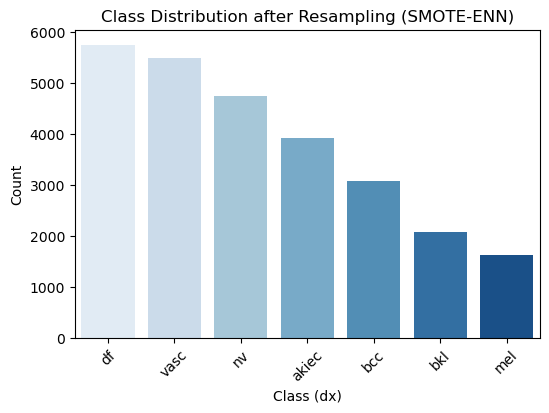

In [42]:
# Count the occurrences of each dx name after resampling
dx_counts = pd.Series(dx_names).value_counts()

# Sort dx names based on their counts in ascending order
dx_names_sorted = dx_counts.index.tolist()

# Count plot of class distribution after resampling with ascending order representation
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(dx_names, dtype=pd.CategoricalDtype(categories=dx_names_sorted)), palette='Blues')
plt.title('Class Distribution after Resampling (SMOTE-ENN)')
plt.xlabel('Class (dx)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### ***DATA SPLITTING***

Train-Test Split: The code splits the resampled data into training and
testing sets with a test size of 20%.

It prints the sizes of the training and testing datasets and their percentage relative to the original dataset.

In [13]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

In [14]:
import numpy as np
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(data.index))*100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(data.index))*100))

X training data size: (21353, 30000)
y training data size: (21353,)
X testing data size: (5339, 30000)
y testing data size: (5339,)
214.43% of data is in training set
53.62% of data is in test set


### ***MODEL BUILDING***
1.K-Nearest Neighbors (KNN):


*   KNN classifies using n_neighbors=5, considering 5 closest neighbors.

*   It's simple and effective for classification with low computational cost.

2.Support vector machine(svm):

*   SVM with OvR and polynomial kernel captures non-linearities.
*   It provides flexibility in handling multi-class data and complex relationships.

3.Random Forest :

*   Random Forest builds decision tree ensembles with efficient hyperparameter tuning.
*   Using RandomizedSearchCV, it efficiently finds the best hyperparameters for improved performance.


#### 1. K-NEAREST NEIGHBORS(KNN)

In [15]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)
# Make predictions
y1 = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y1)
report = classification_report(y_test, y1)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n",report)

Accuracy: 0.8872448023974527
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       805
           1       0.83      0.86      0.84       629
           2       0.69      0.75      0.72       417
           3       0.94      0.94      0.94      1157
           4       0.88      0.68      0.77       323
           5       0.88      0.95      0.91       908
           6       0.92      0.93      0.92      1100

    accuracy                           0.89      5339
   macro avg       0.87      0.85      0.86      5339
weighted avg       0.89      0.89      0.89      5339



Confusion Matrix:
[[ 688   33   27   17    5   13   22]
 [  13  540   27   14    6   12   17]
 [  14   22  311   14    6   25   25]
 [   5   21   14 1090    2   15   10]
 [   3   13   37   11  221   26   12]
 [   3   10    7    7   11  863    7]
 [   2   13   26    8    0   27 1024]]


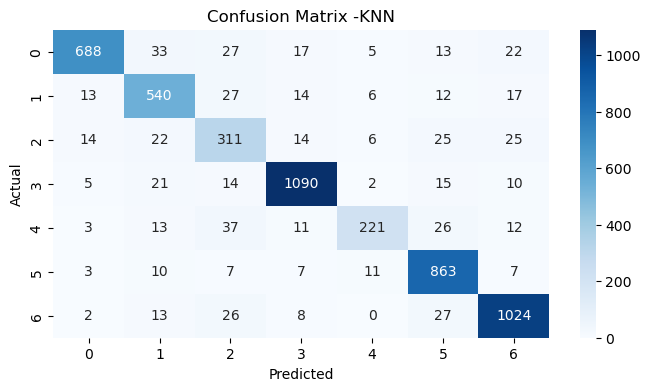

In [16]:
confm = confusion_matrix(y_test, y1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confm)
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(confm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -KNN')
plt.show()

#### 2. SUPPORT VECTOR MACHINE(SVM)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_classifier = SVC(kernel='poly',gamma='auto',decision_function_shape='ovr',random_state=0) # You can choose different kernels and parameters
svm_classifier.fit(X_train, y_train)

# Make predictions
y2 = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y2)
report = classification_report(y_test, y2)
cM = confusion_matrix(y_test, y2)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:")
print(cM)

Accuracy: 0.9155272522944372
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       805
           1       0.84      0.90      0.87       629
           2       0.81      0.78      0.79       417
           3       0.96      0.95      0.96      1157
           4       0.84      0.80      0.82       323
           5       0.95      0.95      0.95       908
           6       0.93      0.95      0.94      1100

    accuracy                           0.92      5339
   macro avg       0.90      0.89      0.89      5339
weighted avg       0.92      0.92      0.92      5339

Confusion Matrix:
[[ 732   23   13   12    3    4   18]
 [  17  564   16   12    5    3   12]
 [   9   31  324    8    9   15   21]
 [   5   14   15 1104    2    5   12]
 [   4    6   15    9  259   18   12]
 [   2    3   11    2   21  865    4]
 [   3   27    8    8   10    4 1040]]


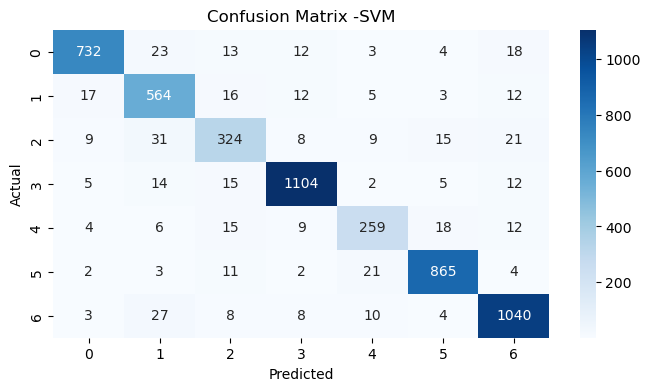

In [18]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -SVM')
plt.show()

#### 3. RANDOMFOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
print("Accuracy:\n",accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n",cm)


Accuracy:
 0.9016669788349878
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       805
           1       0.91      0.83      0.86       629
           2       0.87      0.66      0.75       417
           3       0.92      0.98      0.95      1157
           4       0.84      0.64      0.73       323
           5       0.92      0.94      0.93       908
           6       0.90      0.98      0.94      1100

    accuracy                           0.90      5339
   macro avg       0.89      0.85      0.87      5339
weighted avg       0.90      0.90      0.90      5339

Confusion Matrix:
 [[ 745   12    4   17    4    7   16]
 [  36  519    6   25    3   11   29]
 [  34   21  274   32   13    9   34]
 [   4    2    4 1137    0    2    8]
 [  15    8   16   14  208   41   21]
 [   4    9    8    9   17  850   11]
 [   2    2    3    2    2    8 1081]]


Randomised Searchcv

In [28]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [29]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [34]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score,classification_report
y_pred1=best_random_grid.predict(X_test)
# Evaluate the performance
accuracy1 = accuracy_score(y_test, y_pred1)
report1 = classification_report(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1)

# Print accuracy and classification report
print("Accuracy:\n",accuracy1)
print("Classification Report:\n", report1)
print("Confusion Matrix:\n",cm1)

Accuracy:
 0.9020415808203783
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       805
           1       0.94      0.82      0.87       629
           2       0.87      0.65      0.75       417
           3       0.91      0.99      0.95      1157
           4       0.87      0.64      0.74       323
           5       0.90      0.95      0.92       908
           6       0.89      0.99      0.94      1100

    accuracy                           0.90      5339
   macro avg       0.90      0.85      0.87      5339
weighted avg       0.90      0.90      0.90      5339

Confusion Matrix:
 [[ 735    8    5   19    5   13   20]
 [  30  513   10   24    1   17   34]
 [  33   13  272   43    9   11   36]
 [   0    2    2 1147    0    2    4]
 [  13    2   12   16  206   48   26]
 [   3    6    9    7   14  859   10]
 [   3    0    1    2    1    9 1084]]


##### After applying Randomized Search for hyperparameter tuning, the Random Forest model didn't notably enhance its accuracy compared to the default settings. This suggests that the default hyperparameters might already be optimal for the skin lesion classification task.